In [1]:
%config Completer.use_jedi = False                                       
import warnings                                                             
warnings.filterwarnings(action="ignore")
import numpy as np
import matplotlib.pyplot as plt

***
미분(Differential)
***

<img src="./미분 (2).png">


In [2]:
# diff1(미분할 함수, 미분할 값, delta_X)
def diff1( f, x, h=1e-6 ):
    return ( f(x + h) - f(x) ) / h

***
미분(Differentiation) : 대칭 파생
***

<img src="./미분 (1).png">

In [3]:
# diff2(미분할 함수, 미분할 값, delta_X)
def diff2( f, x, h=1e-6 ):
    return ( f(x + h) - f(x - h) ) / (2 * h)

In [4]:
def f1 ( x ) :
    return (x ** 2)

In [5]:
print( diff1(f1, 1) )
print( diff2(f1, 1) )

2.0000009999243673
2.000000000002


In [6]:
f2 = lambda x : x ** 2

In [7]:
print( diff1(f2, 1) )
print( diff2(f2, 1) )

2.0000009999243673
2.000000000002


***
경사 하강(강하)법
***

In [8]:
#경사 하강법 클래스, Optimizer
class Descent:
    def __init__( self, lr, h=1e-6 ):
        self.lr = lr # 학습률
        self.h = h # 수치 미분을 위해 지정하는 값으로 작을수록 더 정교한 미분을 실행한다.
        
    def diff( self, func, x ) : #미분 함수
        return ( f(x + self.h) - f(x) ) / self.h
        #return ( f(x + self.h) - f(x - self.h) ) / (2 * self.h)
        
    def update ( self, func, x ) : #경사 하강법 업데이트 함수
        dx = self.diff( func, x )
        return ( x - (self.lr * dx) )
    
    def __str__ ( self ) : 
        return ( '경사 하강법 -> 학습률 -> {}'.format (self.lr) )
         
        

In [9]:
# 경사 하강법 시각화 클래스
class DrawDescent :
    def __init__ ( self, func, optimizer ) :
        self.func = func # 최적화하려는 함수
        self.optimizer = optimizer #옵티마이저 <---- ( 경사 하강법, 모멘텀 )
    
    def run ( self, x, iteration ) : #옵티마이저 실행 함수
        self.xs = [ x ]
        for i in range ( iteration ) :
            self.xs.append( self.optimizer.update(self.func, self.xs[-1]) )
        #------- for i
        print( '{}에서 시작해서 {}번 {}을(를) 적용한 결과는 {:5.3f}입니다.'.format(x, iteration, self.optimizer, self.xs[-1]) )
        
    def draw( self, xi, xe ) : #시각화하는 함수
        x = np.linspace( xi, xe, (int(xe - xi) * 100) )
        y = [ self.func(xx) for xx in x ]
        plt.plot( x, y, 'k--' ) # 2차원 곡선 시각화
        ys = [ self.func(xx) for xx in self.xs ] 
        plt.plot( self.xs, ys, 'ro', markersize=3 ) #경사 하강법으로 이동하는 위치 시각화
        plt.show()
        
    def history( self ):
        for i, x in enumerate( self.xs ):
            print( '{:3d}번 {}을(를) 적용한 결과는 {:5.3f}입니다.'.format((i + 1), self.optimizer, x) )

In [10]:
# 경사 하강법 실행
optimizer = Descent( 0.01 ) #경사 하강법 클래스 객체를 생성
print(optimizer)
f = lambda x : x ** 2 # 미분할 대상이 되는 함수
ex = DrawDescent( f, optimizer ) # 경사 하강법을 적용한 결과를 시각화하는 클래스 객체 생성

경사 하강법 -> 학습률 -> 0.01


In [11]:
ex.run( 2, 100 ) # 2에서 출발해서 경사 하강법을 100번 적용한다.

2에서 시작해서 100번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 0.265입니다.


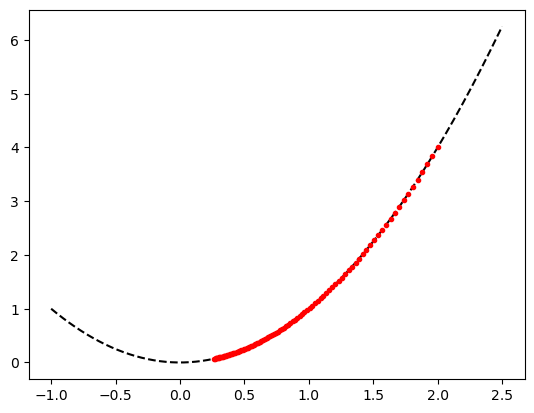

In [12]:
ex.draw( -1, 2.5 ) # 경사 하강법 실행 결과 시각화

In [13]:
ex.history(  )

  1번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 2.000입니다.
  2번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.960입니다.
  3번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.921입니다.
  4번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.882입니다.
  5번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.845입니다.
  6번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.808입니다.
  7번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.772입니다.
  8번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.736입니다.
  9번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.702입니다.
 10번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.667입니다.
 11번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.634입니다.
 12번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.601입니다.
 13번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.569입니다.
 14번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.538입니다.
 15번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.507입니다.
 16번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.477입니다.
 17번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.448입니다.
 18번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.419입니다.
 19번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.390입니다.
 20번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.362입니다.
 21번 경사 하강법 -> 학습률 -

2에서 시작해서 100번 경사 하강법 -> 학습률 -> 0.1을(를) 적용한 결과는 -0.000입니다.


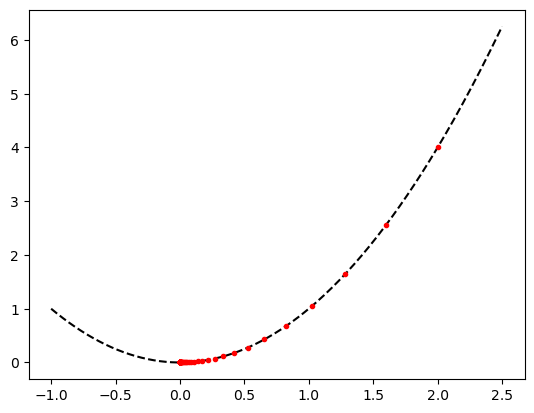

  1번 경사 하강법 -> 학습률 -> 0.1을(를) 적용한 결과는 2.000입니다.
  2번 경사 하강법 -> 학습률 -> 0.1을(를) 적용한 결과는 1.600입니다.
  3번 경사 하강법 -> 학습률 -> 0.1을(를) 적용한 결과는 1.280입니다.
  4번 경사 하강법 -> 학습률 -> 0.1을(를) 적용한 결과는 1.024입니다.
  5번 경사 하강법 -> 학습률 -> 0.1을(를) 적용한 결과는 0.819입니다.
  6번 경사 하강법 -> 학습률 -> 0.1을(를) 적용한 결과는 0.655입니다.
  7번 경사 하강법 -> 학습률 -> 0.1을(를) 적용한 결과는 0.524입니다.
  8번 경사 하강법 -> 학습률 -> 0.1을(를) 적용한 결과는 0.419입니다.
  9번 경사 하강법 -> 학습률 -> 0.1을(를) 적용한 결과는 0.336입니다.
 10번 경사 하강법 -> 학습률 -> 0.1을(를) 적용한 결과는 0.268입니다.
 11번 경사 하강법 -> 학습률 -> 0.1을(를) 적용한 결과는 0.215입니다.
 12번 경사 하강법 -> 학습률 -> 0.1을(를) 적용한 결과는 0.172입니다.
 13번 경사 하강법 -> 학습률 -> 0.1을(를) 적용한 결과는 0.137입니다.
 14번 경사 하강법 -> 학습률 -> 0.1을(를) 적용한 결과는 0.110입니다.
 15번 경사 하강법 -> 학습률 -> 0.1을(를) 적용한 결과는 0.088입니다.
 16번 경사 하강법 -> 학습률 -> 0.1을(를) 적용한 결과는 0.070입니다.
 17번 경사 하강법 -> 학습률 -> 0.1을(를) 적용한 결과는 0.056입니다.
 18번 경사 하강법 -> 학습률 -> 0.1을(를) 적용한 결과는 0.045입니다.
 19번 경사 하강법 -> 학습률 -> 0.1을(를) 적용한 결과는 0.036입니다.
 20번 경사 하강법 -> 학습률 -> 0.1을(를) 적용한 결과는 0.029입니다.
 21번 경사 하강법 -> 학습률 -> 0.1을(를) 적용한 결과는 0.

In [14]:
optimizer = Descent( 0.1 ) # 학습률을 0.01에서 0.1로 변경한 경사 하강법
ex = DrawDescent( f, optimizer ) 
ex.run( 2, 100 ) # 2에서 출발해서 경사 하강법을 100번 적용한다.
ex.draw( -1, 2.5 ) # 경사 하강법 실행 결과 시각화
ex.history(  )

2에서 시작해서 100번 경사 하강법 -> 학습률 -> 1을(를) 적용한 결과는 2.000입니다.


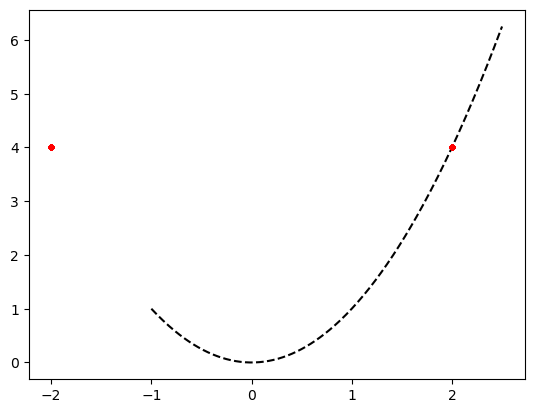

  1번 경사 하강법 -> 학습률 -> 1을(를) 적용한 결과는 2.000입니다.
  2번 경사 하강법 -> 학습률 -> 1을(를) 적용한 결과는 -2.000입니다.
  3번 경사 하강법 -> 학습률 -> 1을(를) 적용한 결과는 2.000입니다.
  4번 경사 하강법 -> 학습률 -> 1을(를) 적용한 결과는 -2.000입니다.
  5번 경사 하강법 -> 학습률 -> 1을(를) 적용한 결과는 2.000입니다.
  6번 경사 하강법 -> 학습률 -> 1을(를) 적용한 결과는 -2.000입니다.
  7번 경사 하강법 -> 학습률 -> 1을(를) 적용한 결과는 2.000입니다.
  8번 경사 하강법 -> 학습률 -> 1을(를) 적용한 결과는 -2.000입니다.
  9번 경사 하강법 -> 학습률 -> 1을(를) 적용한 결과는 2.000입니다.
 10번 경사 하강법 -> 학습률 -> 1을(를) 적용한 결과는 -2.000입니다.
 11번 경사 하강법 -> 학습률 -> 1을(를) 적용한 결과는 2.000입니다.
 12번 경사 하강법 -> 학습률 -> 1을(를) 적용한 결과는 -2.000입니다.
 13번 경사 하강법 -> 학습률 -> 1을(를) 적용한 결과는 2.000입니다.
 14번 경사 하강법 -> 학습률 -> 1을(를) 적용한 결과는 -2.000입니다.
 15번 경사 하강법 -> 학습률 -> 1을(를) 적용한 결과는 2.000입니다.
 16번 경사 하강법 -> 학습률 -> 1을(를) 적용한 결과는 -2.000입니다.
 17번 경사 하강법 -> 학습률 -> 1을(를) 적용한 결과는 2.000입니다.
 18번 경사 하강법 -> 학습률 -> 1을(를) 적용한 결과는 -2.000입니다.
 19번 경사 하강법 -> 학습률 -> 1을(를) 적용한 결과는 2.000입니다.
 20번 경사 하강법 -> 학습률 -> 1을(를) 적용한 결과는 -2.000입니다.
 21번 경사 하강법 -> 학습률 -> 1을(를) 적용한 결과는 2.000입니다.
 22번 경사 하강법 -> 학습률 -> 1을

In [15]:
optimizer = Descent( 1 ) # 학습률을 0.01에서 0.1로 변경한 경사 하강법 -> 학습률이 너무 크다.
ex = DrawDescent( f, optimizer ) 
ex.run( 2, 100 ) # 2에서 출발해서 경사 하강법을 100번 적용한다.
ex.draw( -1, 2.5 ) # 경사 하강법 실행 결과 시각화
ex.history(  )

2에서 시작해서 100번 경사 하강법 -> 학습률 -> 0.001을(를) 적용한 결과는 1.637입니다.


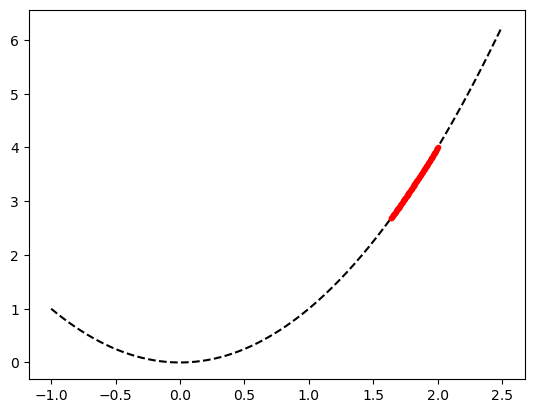

  1번 경사 하강법 -> 학습률 -> 0.001을(를) 적용한 결과는 2.000입니다.
  2번 경사 하강법 -> 학습률 -> 0.001을(를) 적용한 결과는 1.996입니다.
  3번 경사 하강법 -> 학습률 -> 0.001을(를) 적용한 결과는 1.992입니다.
  4번 경사 하강법 -> 학습률 -> 0.001을(를) 적용한 결과는 1.988입니다.
  5번 경사 하강법 -> 학습률 -> 0.001을(를) 적용한 결과는 1.984입니다.
  6번 경사 하강법 -> 학습률 -> 0.001을(를) 적용한 결과는 1.980입니다.
  7번 경사 하강법 -> 학습률 -> 0.001을(를) 적용한 결과는 1.976입니다.
  8번 경사 하강법 -> 학습률 -> 0.001을(를) 적용한 결과는 1.972입니다.
  9번 경사 하강법 -> 학습률 -> 0.001을(를) 적용한 결과는 1.968입니다.
 10번 경사 하강법 -> 학습률 -> 0.001을(를) 적용한 결과는 1.964입니다.
 11번 경사 하강법 -> 학습률 -> 0.001을(를) 적용한 결과는 1.960입니다.
 12번 경사 하강법 -> 학습률 -> 0.001을(를) 적용한 결과는 1.956입니다.
 13번 경사 하강법 -> 학습률 -> 0.001을(를) 적용한 결과는 1.953입니다.
 14번 경사 하강법 -> 학습률 -> 0.001을(를) 적용한 결과는 1.949입니다.
 15번 경사 하강법 -> 학습률 -> 0.001을(를) 적용한 결과는 1.945입니다.
 16번 경사 하강법 -> 학습률 -> 0.001을(를) 적용한 결과는 1.941입니다.
 17번 경사 하강법 -> 학습률 -> 0.001을(를) 적용한 결과는 1.937입니다.
 18번 경사 하강법 -> 학습률 -> 0.001을(를) 적용한 결과는 1.933입니다.
 19번 경사 하강법 -> 학습률 -> 0.001을(를) 적용한 결과는 1.929입니다.
 20번 경사 하강법 -> 학습률 -> 0.001을(를) 적용한 결과는 1.925입니다.


In [16]:
optimizer = Descent( 0.001 ) # 학습률을 0.01에서 0.1로 변경한 경사 하강법 -> 학습률이 너무 작다.
ex = DrawDescent( f, optimizer ) 
ex.run( 2, 100 ) # 2에서 출발해서 경사 하강법을 100번 적용한다.
ex.draw( -1, 2.5 ) # 경사 하강법 실행 결과 시각화
ex.history(  )

In [17]:
# 가운데 평탄한(기울기가 0인) 구간이 있는 함수
def f3( x ):
    if x > 1:
        return x ** 2
    elif x > 0.2 :
        return 1
    else : 
        return 25 * x ** 2

2에서 시작해서 100번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 0.265입니다.


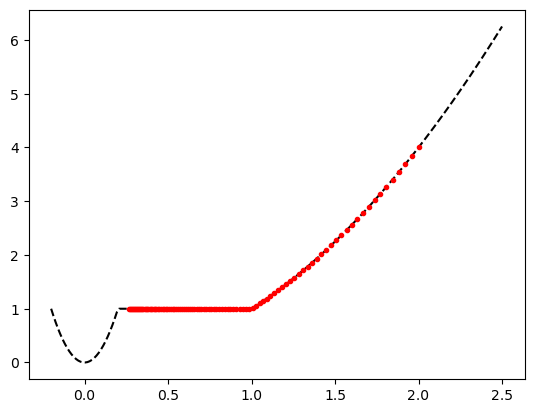

  1번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 2.000입니다.
  2번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.960입니다.
  3번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.921입니다.
  4번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.882입니다.
  5번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.845입니다.
  6번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.808입니다.
  7번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.772입니다.
  8번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.736입니다.
  9번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.702입니다.
 10번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.667입니다.
 11번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.634입니다.
 12번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.601입니다.
 13번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.569입니다.
 14번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.538입니다.
 15번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.507입니다.
 16번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.477입니다.
 17번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.448입니다.
 18번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.419입니다.
 19번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.390입니다.
 20번 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.362입니다.
 21번 경사 하강법 -> 학습률 -

In [18]:
optimizer = Descent( 0.01 ) 
ex = DrawDescent( f3, optimizer ) 
ex.run( 2, 100 ) 
ex.draw( -0.2, 2.5 )
ex.history(  )

***
모멘텀(Momentum)
***

In [19]:
# 모렌텀 클래스, 옵티마이저
class Momentum:
    def __init__( self, mu, lr, h=1e-6 ):
        self.previous = 0 # 이전에 얼마나 움직였는가 기록한다.
        self.mu = mu # 관성, 보통 0.8이나 0.9정도를 사용한다. -> 1이면 무한등속운동
        self.lr = lr 
        self.h = h 
        
    def diff( self, func, x ) :
        return ( f(x + self.h) - f(x) ) / self.h
        #return ( f(x + self.h) - f(x - self.h) ) / (2 * self.h)
        
    def update ( self, func, x ) : 
        #dx = self.diff( func, x ) # 경사 하강법
        dx = ( self.previous * self.mu ) - ( self.lr * self.diff(func, x) )
        self.previous = dx # 이전에 움직인 거리를 저장한다.
        #return ( x - (self.lr * dx) ) #경사 하강법
        return ( x + dx )
    
    def __str__ ( self ) : 
        return ( '모멘텀 경사 하강법 -> 학습률 -> {}'.format (self.lr) )
         

2에서 시작해서 15번 모멘텀 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 -0.149입니다.


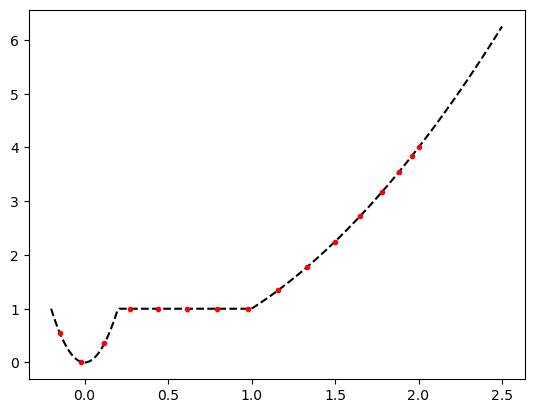

  1번 모멘텀 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 2.000입니다.
  2번 모멘텀 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.960입니다.
  3번 모멘텀 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.885입니다.
  4번 모멘텀 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.779입니다.
  5번 모멘텀 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.649입니다.
  6번 모멘텀 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.499입니다.
  7번 모멘텀 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.333입니다.
  8번 모멘텀 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 1.158입니다.
  9번 모멘텀 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 0.977입니다.
 10번 모멘텀 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 0.794입니다.
 11번 모멘텀 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 0.614입니다.
 12번 모멘텀 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 0.440입니다.
 13번 모멘텀 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 0.274입니다.
 14번 모멘텀 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 0.119입니다.
 15번 모멘텀 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 -0.022입니다.
 16번 모멘텀 경사 하강법 -> 학습률 -> 0.01을(를) 적용한 결과는 -0.149입니다.


In [20]:
optimizer = Momentum( 0.9, 0.01 ) # 관성 0.9, 학습률 0.01인 모멘텀 옵티마이저 객체 생성
ex = DrawDescent( f3, optimizer ) 
ex.run( 2, 15 ) 
ex.draw( -0.2, 2.5 )
ex.history(  )

## 